# Projeto: Ligações para o 911: Fogo, Trânsito, Emergência Médica no Condado de Montgomery - Pensilvânia

#### "Emergency (911) Calls: Fire, Traffic, EMS for Montgomery County, PA"

Para este projeto analisarei alguns dados de chamadas do 911 do [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Os dados contém os seguintes campos:

* lat: Variável String, Latitude
* lng: Variável String, Longitude
* desc: Variável String, Descrição da Chamada de Emergência
* zip: Variável String, CEP
* título: Variável String, Título
* timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
* twp: Variável String, Township
* addr: Variável String, Endereço
* e: Variável String, variável Dummy (sempre 1)

## Dados e Configuração

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

** lendo o arquivo e verificando colunas **

In [2]:
df = pd.read_csv('911.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Verificando cabeçalho do df **

In [3]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Perguntas básicas

** Quais são os top 5 CEPs nas chamadas 911? **

In [4]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** Quais são os 5 principais municípios nas chamadas 911? **

In [5]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Quantos códigos de título exclusivos existem na coluna title? **

In [6]:
df['title'].nunique()

110

## Criando novos recursos

** Na coluna "title" existem "Razões / Departamentos" especificados antes do código do título. Estes são "EMS", "Fire" e "Traffic" **

** Aqui eu crio uma coluna nova (Reason) contendo o valor das 'Razões' **

** Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason seria EMS. **

** OBS: EMS significa "Emergency Medical Services"

In [7]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

** Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna? **

In [8]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Usando Seaborn para criar um countplot de chamadas 911 baseadas nesta nova coluna. **

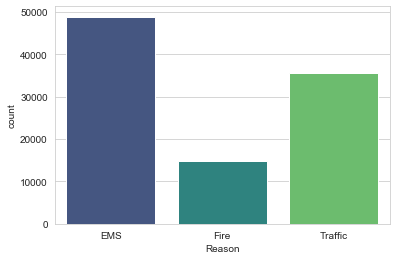

In [9]:
sns.countplot(x='Reason',data=df,palette='viridis')
plt.show()

** Agora vamos começar a focar em informações de tempo. Qual é o tipo de dados dos objetos na coluna timeStamp? **

In [10]:
type(df['timeStamp'].iloc[0])

str

** Convertendo a coluna de strings em objetos DateTime, o que me permite consultar por dia, mês ou ano. **

In [11]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

** Criando colunas de mês, ano, hora e dia da semana ** 

In [12]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Year'] = df['timeStamp'].apply(lambda time: time.year)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [13]:
df['Day of Week'].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

** Mapeando os nomes das seqüências reais para o dia da semana: **

In [14]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [15]:
df['Day of Week'] = df['Day of Week'].map(dmap)

** Usando Seaborn para criar um countplot da coluna "Day of Week" com hue na coluna Reason **

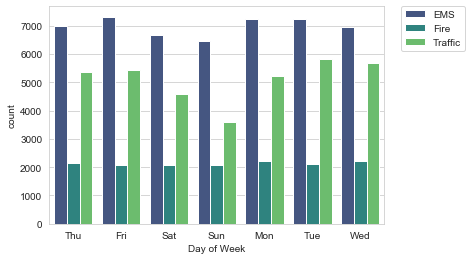

In [16]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** O mesmo para o mês: **

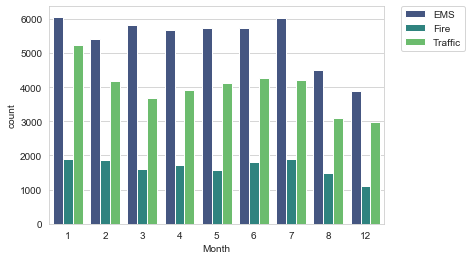

In [17]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Constatação: Estão faltando alguns meses. Setembro, Outubro e Novembro **

In [42]:
print(df[df.Year==2015]['Month'].value_counts())
print(df[df.Year==2016]['Month'].value_counts())

12    7969
Name: Month, dtype: int64
1    13205
7    12137
6    11786
2    11467
5    11423
4    11326
3    11101
8     9078
Name: Month, dtype: int64


** podemos ver acima que o período vai de 12/2015 até 08/2016 **

** Agrupando por mês e vendo a contagem dos valores**

In [46]:
byMonth = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Year,Day of Week,Date
Month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


** Criando um plot simples indicando a contagem de chamadas por mês (desconsiderando o ano). **

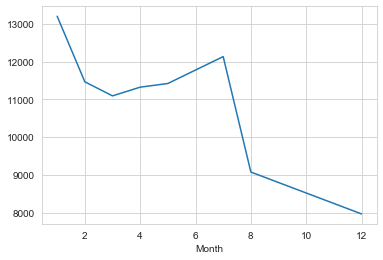

In [44]:
# Could be any column
byMonth['twp'].plot()

** Constatação: O plot apresenta os meses 9,10 e 11 com uma estimativa **

** Criando um modelo linear no número de chamadas por mês. Para isso é necessário resetar o índice em uma coluna. **

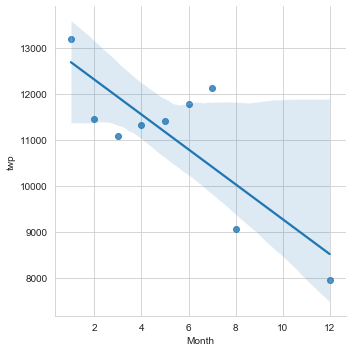

In [20]:
sns.lmplot(x='Month',y='twp',data = byMonth.reset_index())
#plt.show()

** Criando uma nova coluna (Data) contendo a data da coluna timeStamp. 

In [21]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

** Agrupando o DataFrame pela coluna Data, contando as ocorrencias (por data), e plotando um gráfico. 

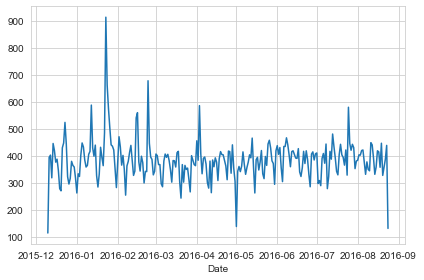

In [22]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()
# Da documentação: tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area. This is an experimental feature and may not work for some cases. 

** O mesmo gráfico, mas agora para cada tipo de razão de ocorrencia (Reason) **

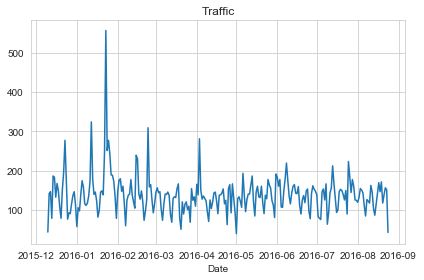

In [23]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

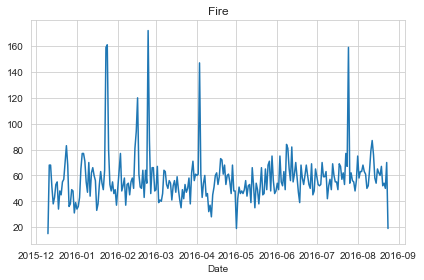

In [24]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

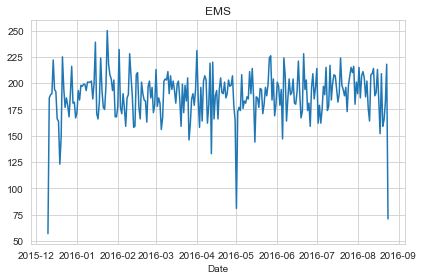

In [25]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

_________________
** CRIANDO MAPAS DE CALOR **

** Reestruturando o quadro de dados para que as colunas se tornem horas e o indice o dia da semana. **

In [55]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** Criando um Heatmap usando este DataFrame. **

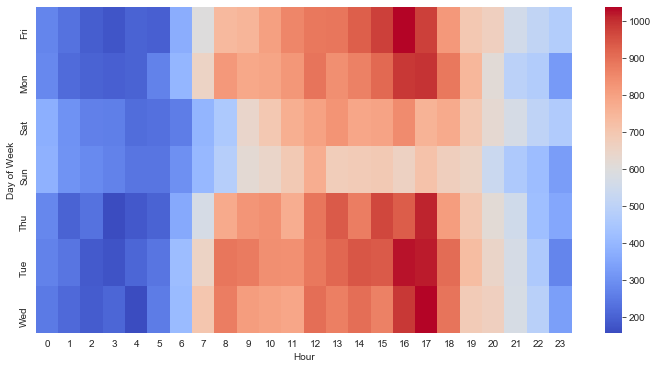

In [69]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='coolwarm')

** Criando um clustermap. **

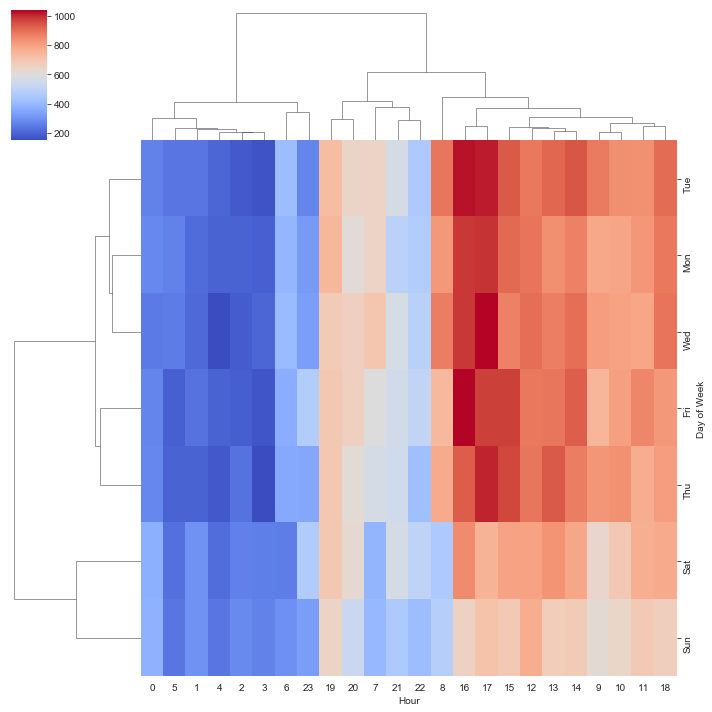

In [70]:
sns.clustermap(dayHour,cmap='coolwarm')

** Como podemos ver, is dias da semana e as horas não estão em ordem. Eles foram agrupados por similaridades. Isso permite identificar mais facilmente que, por exemplo, no meio do mês (dias 16,17,15,12,13,14), durante a semana, (entre segunda e sexta / Mon - Fri) estão os dias com maior ligações para o 911. E que os primeiros dias (0,5,1,4,2,3) são os dias com menos ocorrências **

** Repetirei os últimos plots para um DataFrame que mostra o mês como a coluna. **

In [57]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


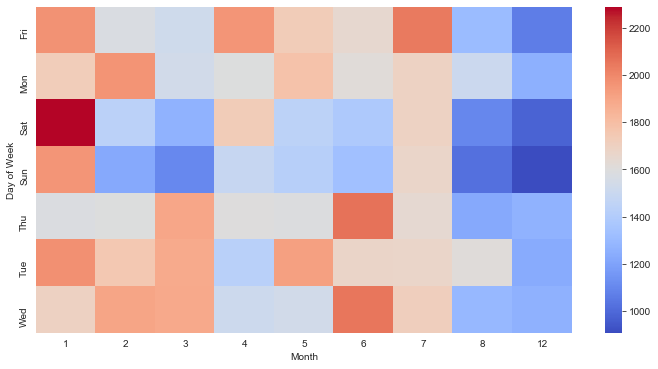

In [71]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='coolwarm')

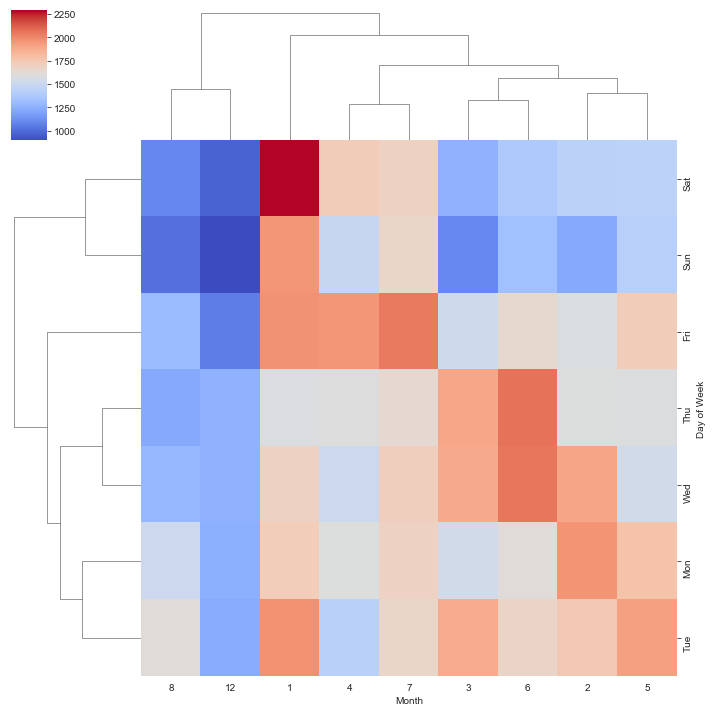

In [72]:
sns.clustermap(dayMonth,cmap='coolwarm')